# 長距離伝送シミュレーションを行う

In [13]:
#import
import sys

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('../')
from pyopt import modulate as md
from pyopt import transmission as tr

# 1. PRBS信号を伝送する

## 1.1 PRBS信号を生成する

In [6]:
N = 7  # PRBSの次数
itr = 1  # PRBSの繰り返し回数

In [8]:
bitsq = md.prbs(N=N, itr=itr)

print('ビット列: ', bitsq)
print('ビット長: ', bitsq.shape)

ビット列:  [1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0
 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1
 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0
 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1]
ビット長:  (128,)


## 1.2 PRBS信号を変調する

In [11]:
form = 'RZ16QAM'  # 変調方式
n = 32  # 1シンボルあたりのサンプリング数[/symbol]
equalize = False  # 各シンボル数を均等にするか

In [15]:
mdl = md.Modulate(form=form, n=n, equalize=equalize)
modsq = mdl.transform(bitsq)

print('シンボル列: ', modsq[:40])
print('シンボル長: ', modsq.shape)  # 128 / 4 * 32 = 1024

rz16QAM modulation START
シンボル列:  [0.        +0.j         0.0438346 -0.0438346j  0.08724704-0.08724704j
 0.12981925-0.12981925j 0.17114123-0.17114123j 0.21081503-0.21081503j
 0.24845856-0.24845856j 0.2837093 -0.2837093j  0.31622777-0.31622777j
 0.34570078-0.34570078j 0.37184451-0.37184451j 0.39440718-0.39440718j
 0.41317149-0.41317149j 0.42795673-0.42795673j 0.43862051-0.43862051j
 0.44506014-0.44506014j 0.4472136 -0.4472136j  0.44506014-0.44506014j
 0.43862051-0.43862051j 0.42795673-0.42795673j 0.41317149-0.41317149j
 0.39440718-0.39440718j 0.37184451-0.37184451j 0.34570078-0.34570078j
 0.31622777-0.31622777j 0.2837093 -0.2837093j  0.24845856-0.24845856j
 0.21081503-0.21081503j 0.17114123-0.17114123j 0.12981925-0.12981925j
 0.08724704-0.08724704j 0.0438346 -0.0438346j  0.        +0.j
 0.0438346 -0.13150379j 0.08724704-0.26174113j 0.12981925-0.38945776j
 0.17114123-0.5134237j  0.21081503-0.63244509j 0.24845856-0.74537568j
 0.2837093 -0.8511279j ]
シンボル長:  (1024,)


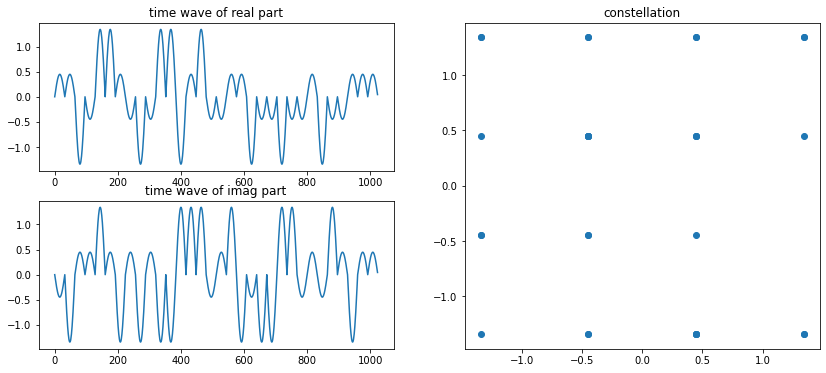

In [25]:
# 可視化
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(1, 2, 2)

ax1.plot(modsq.real)
ax1.set_title('time wave of real part')

ax2.plot(modsq.imag)
ax2.set_title('time wave of imag part')

ax3.plot(modsq[int(n/2):: n].real, modsq[int(n/2):: n].imag, 'o')
ax3.set_title('constellation');

## 1.3 16QAM変調されたPRBS信号を伝送する

In [26]:
boudrate = 28  # ボーレート[GBaud]
PdBm = 1  # 平均入力光パワー[dBm]
Ledfa = 100  # EDFAスパン[km]
stepedfa = 30  # SSFMの繰り返し計算ステップ数
gamma = 1.4  # 非線形係数[/W/km]
D = 16  # 分散パラメータ[ps/nm/km]
Alpha = 0.16  # 伝送損失[dB/km]
NF = 4  # ASE雑音指数[dB]